# NLP Assignment 1 (40% of grade): Text classification for Fake News Detection

This coursework will involve you implementing functions for a text classifier, which you will train to detect **fake news** in a corpus of approx. 10,000 statements, which will be split into a 80%/20% training/test split. 

In this template you are given the basis for that implementation, though some of the functions are missing, which you have to fill in.

Follow the instructions file **NLP_Assignment_1_Instructions.pdf** for details of each question - the outline of what needs to be achieved for each question is as below.

You must submit all **ipython notebooks and extra resources you need to run the code if you've added them** in the code submission, and a **2 page report (pdf)** in the report submission on QMPlus where you report your methods and findings according to the instructions file for each question.

In [1]:
!pip install nltk

In [2]:
import csv                               # csv reader
from sklearn.svm import LinearSVC
from nltk.classify import SklearnClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_recall_fscore_support # to report on precision and recall
import numpy as np
import re

In [3]:
def load_data(path):
    """Load data from a tab-separated file and append it to raw_data."""
    with open(path) as f:
        reader = csv.reader(f, delimiter='\t')
        for line in reader:
            if line[0] == "Id":  # skip header
                continue
            (label, text) = parse_data_line(line)
            raw_data.append((text, label))

def split_and_preprocess_data(percentage):
    """Split the data between train_data and test_data according to the percentage
    and performs the preprocessing."""
    num_samples = len(raw_data)
    num_training_samples = int((percentage * num_samples))
    for (text, label) in raw_data[:num_training_samples]:
        train_data.append((to_feature_vector(pre_process(text)),label))
    for (text, label) in raw_data[num_training_samples:]:
        test_data.append((to_feature_vector(pre_process(text)),label))

# Question 1: Input and Basic preprocessing (10 marks)

In [4]:
def convert_label(label):
    """Converts the multiple classes into two,
    making it a binary distinction between fake news and real."""
    #return label
    # Converting the multiclass labels to binary label
    labels_map = {
        'true': 'REAL',
        'mostly-true': 'REAL',
        'half-true': 'REAL',
        'false': 'FAKE',
        'barely-true': 'FAKE',
        'pants-fire': 'FAKE'
    }
    return labels_map[label]


def parse_data_line(data_line):
    data_line_vals = data_line
    label = convert_label(data_line_vals[1])
    statement = data_line_vals[2]
    # Should return a tuple of the label as just FAKE or REAL and the statement
    # e.g. (label, statement)
    return (label, statement)

In [5]:

# Input: a string of one statement
def pre_process(text):
    text = re.sub(r"(\w)([.,;:!?'\"”\)])", r"\1 \2", text)
    text = re.sub(r"([.,;:!?'\"“\(\)])(\w)", r"\1 \2", text)
    tokens = re.split(r"\s+",text)
    # normalisation - only by lower casing for now
    tokens = [t.lower() for t in tokens]
    return tokens

# Question 2: Basic Feature Extraction (20 marks)

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

In [7]:
global_feature_dict = {} # A global dictionary of features

def to_feature_vector(tokens):
    # Should return a dictionary containing features as keys, and weights as values
    # Defining the count_vect as = to the CountVectorizer() function.
    # This function will transform our tokens into a matrix, with each row corresponding to the statement and the columns to the number for features for each token.
    # It will also give us the frequency of each token as it's weight.
    # To create the dictionary, we can use the .vocabulary_ to method to assign the keys and it's value.
    # We then update our global dictionary using vocab variable.
    # The function will return vocab (i.e a dictionary that has been transformed with the CountVectorizer)
    count_vect = CountVectorizer()
    count_vect.fit_transform(tokens)
    vocab = count_vect.vocabulary_
    global_feature_dict.update(vocab)
    return vocab

In [8]:
# TRAINING AND VALIDATING OUR CLASSIFIER

def train_classifier(data):
    print("Training Classifier...")
    pipeline =  Pipeline([('svc', LinearSVC())])
    return SklearnClassifier(pipeline).train(data)

# Question 3: Cross-validation (20 marks)

In [9]:
# #solution
# from sklearn.metrics import classification_report
# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import KFold


# def cross_validate(dataset, folds):
#     results = []
#     fold_size = int(len(dataset)/folds) + 1 #length of dataset/10 + 1 to split the data evenly. so 10 + 1. We add one to allow us to have 10 folds, as python starts at 0.
    
#     for i in range(0,len(dataset),int(fold_size)):
#         print("Fold start on items %d - %d" % (i, i+fold_size))
#         train = dataset[0:i] + dataset[i+fold_size:]
#         val = dataset[i:i+fold_size]
#         classifier = train_classifier(train)
#         predicted_labels = predict_labels(val, classifier)
        
#         acc = accuracy_score(pred_values , y_test)
        
#     return None

In [10]:
#solution
from sklearn.metrics import classification_report


def cross_validate(dataset, folds):
    results = []
    fold_size = int(len(dataset)/folds) + 1 #length of dataset/10 + 1 to split the data evenly. so 10 + 1. We add one to allow us to have 10 folds, as python starts at 0.
    
    for i in range(0,len(dataset),int(fold_size)): # range(start at 0, stop at the end of the dataset, for each )
        # insert code here that trains and tests on the 10 folds of data in the dataset
        
        print("Fold start on items %d - %d" % (i, i+fold_size))
        # FILL IN THE METHOD HERE
        train_sample = dataset[:i] + dataset[i+fold_size:]
        test_sample = dataset[i:i+fold_size]
        cv = train_classifier(train_sample)
        test_sample_x = [i[0] for i in test_sample]
        test_sample_y = [i[1] for i in test_sample]
        predicted_labels = predict_labels(test_sample_x,cv)
        cv_results = classification_report(test_sample_y,predicted_labels)
        print(cv_results)
        results.append(cv_results)
    return results

In [11]:
# PREDICTING LABELS GIVEN A CLASSIFIER

def predict_labels(samples, classifier):
    """Assuming preprocessed samples, return their predicted labels from the classifier model."""
    return classifier.classify_many(samples)

def predict_label_from_raw(sample, classifier):
    """Assuming raw text, return its predicted label from the classifier model."""
    return classifier.classify(to_feature_vector(preProcess(reviewSample)))

In [12]:
# MAIN

# loading reviews
# initialize global lists that will be appended to by the methods below
raw_data = []          # the filtered data from the dataset file
train_data = []        # the pre-processed training data as a percentage of the total dataset
test_data = []         # the pre-processed test data as a percentage of the total dataset


# references to the data files
data_file_path = 'fake_news.tsv'

# Do the actual stuff (i.e. call the functions we've made)
# We parse the dataset and put it in a raw data list
print("Now %d rawData, %d trainData, %d testData" % (len(raw_data), len(train_data), len(test_data)),
      "Preparing the dataset...",sep='\n')

load_data(data_file_path) 

# We split the raw dataset into a set of training data and a set of test data (80/20)
# You do the cross validation on the 80% (training data)
# We print the number of training samples and the number of features before the split
print("Now %d rawData, %d trainData, %d testData" % (len(raw_data), len(train_data), len(test_data)),
      "Preparing training and test data...",sep='\n')

split_and_preprocess_data(0.8)

# We print the number of training samples and the number of features after the split
print("After split, %d rawData, %d trainData, %d testData" % (len(raw_data), len(train_data), len(test_data)),
      "Training Samples: ", len(train_data), "Features: ", len(global_feature_dict), sep='\n')


Now 0 rawData, 0 trainData, 0 testData
Preparing the dataset...
Now 10241 rawData, 0 trainData, 0 testData
Preparing training and test data...
After split, 10241 rawData, 8192 trainData, 2049 testData
Training Samples: 
8192
Features: 
12193


In [13]:
cross_validate(train_data, 10)  # will work and output overall performance of p, r, f-score when cv implemented

Fold start on items 0 - 820
Training Classifier...


/Users/samson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


              precision    recall  f1-score   support

        FAKE       0.45      0.47      0.46       339
        REAL       0.62      0.60      0.61       481

    accuracy                           0.55       820
   macro avg       0.54      0.54      0.54       820
weighted avg       0.55      0.55      0.55       820

Fold start on items 820 - 1640
Training Classifier...


/Users/samson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


              precision    recall  f1-score   support

        FAKE       0.51      0.53      0.52       375
        REAL       0.59      0.56      0.57       445

    accuracy                           0.55       820
   macro avg       0.55      0.55      0.55       820
weighted avg       0.55      0.55      0.55       820

Fold start on items 1640 - 2460
Training Classifier...


/Users/samson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


              precision    recall  f1-score   support

        FAKE       0.53      0.49      0.51       392
        REAL       0.57      0.60      0.58       428

    accuracy                           0.55       820
   macro avg       0.55      0.55      0.55       820
weighted avg       0.55      0.55      0.55       820

Fold start on items 2460 - 3280
Training Classifier...


/Users/samson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


              precision    recall  f1-score   support

        FAKE       0.48      0.50      0.49       357
        REAL       0.60      0.58      0.59       463

    accuracy                           0.54       820
   macro avg       0.54      0.54      0.54       820
weighted avg       0.55      0.54      0.54       820

Fold start on items 3280 - 4100
Training Classifier...


/Users/samson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


              precision    recall  f1-score   support

        FAKE       0.48      0.50      0.49       348
        REAL       0.62      0.60      0.61       472

    accuracy                           0.56       820
   macro avg       0.55      0.55      0.55       820
weighted avg       0.56      0.56      0.56       820

Fold start on items 4100 - 4920
Training Classifier...


/Users/samson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


              precision    recall  f1-score   support

        FAKE       0.48      0.51      0.49       349
        REAL       0.62      0.58      0.60       471

    accuracy                           0.55       820
   macro avg       0.55      0.55      0.55       820
weighted avg       0.56      0.55      0.56       820

Fold start on items 4920 - 5740
Training Classifier...


/Users/samson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


              precision    recall  f1-score   support

        FAKE       0.45      0.48      0.46       349
        REAL       0.59      0.57      0.58       471

    accuracy                           0.53       820
   macro avg       0.52      0.52      0.52       820
weighted avg       0.53      0.53      0.53       820

Fold start on items 5740 - 6560
Training Classifier...


/Users/samson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


              precision    recall  f1-score   support

        FAKE       0.50      0.51      0.51       357
        REAL       0.62      0.60      0.61       463

    accuracy                           0.56       820
   macro avg       0.56      0.56      0.56       820
weighted avg       0.57      0.56      0.57       820

Fold start on items 6560 - 7380
Training Classifier...


/Users/samson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


              precision    recall  f1-score   support

        FAKE       0.47      0.49      0.48       363
        REAL       0.58      0.56      0.57       457

    accuracy                           0.53       820
   macro avg       0.53      0.53      0.53       820
weighted avg       0.53      0.53      0.53       820

Fold start on items 7380 - 8200
Training Classifier...
              precision    recall  f1-score   support

        FAKE       0.46      0.53      0.49       333
        REAL       0.64      0.57      0.60       479

    accuracy                           0.56       812
   macro avg       0.55      0.55      0.55       812
weighted avg       0.57      0.56      0.56       812



/Users/samson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


['              precision    recall  f1-score   support\n\n        FAKE       0.45      0.47      0.46       339\n        REAL       0.62      0.60      0.61       481\n\n    accuracy                           0.55       820\n   macro avg       0.54      0.54      0.54       820\nweighted avg       0.55      0.55      0.55       820\n',
 '              precision    recall  f1-score   support\n\n        FAKE       0.51      0.53      0.52       375\n        REAL       0.59      0.56      0.57       445\n\n    accuracy                           0.55       820\n   macro avg       0.55      0.55      0.55       820\nweighted avg       0.55      0.55      0.55       820\n',
 '              precision    recall  f1-score   support\n\n        FAKE       0.53      0.49      0.51       392\n        REAL       0.57      0.60      0.58       428\n\n    accuracy                           0.55       820\n   macro avg       0.55      0.55      0.55       820\nweighted avg       0.55      0.55      0.

# 4. Error Analysis (10 marks)

In [14]:
from sklearn import metrics
import matplotlib.pyplot as plt
# a function to make the confusion matrix readable and pretty
def confusion_matrix_heatmap(y_test, preds, labels):
    """Function to plot a confusion matrix"""
    # pass labels to the confusion matrix function to ensure right order
    cm = metrics.confusion_matrix(y_true=y_test, y_pred=preds, labels=labels)
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title('Confusion matrix of the classifier')
    fig.colorbar(cax)
    ax.set_xticks(np.arange(len(labels)))
    ax.set_yticks(np.arange(len(labels)))
    ax.set_xticklabels( labels, rotation=45)
    ax.set_yticklabels( labels)

    for i in range(len(cm)):
        for j in range(len(cm)):
            text = ax.text(j, i, cm[i, j],
                           ha="center", va="center", color="w")

    plt.xlabel('Predicted')
    plt.ylabel('True')
    
    # fix for mpl bug that cuts off top/bottom of seaborn viz:
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show() # ta-da!
    plt.show()

In [15]:
cv = train_classifier(train_data)
test_x = [i[0] for i in test_data]
test_y = [i[1] for i in test_data]
pred = predict_labels(test_x,cv)
cv_results = classification_report(test_y,pred)

print(cv_results)

Training Classifier...
              precision    recall  f1-score   support

        FAKE       0.49      0.49      0.49       926
        REAL       0.58      0.57      0.57      1123

    accuracy                           0.53      2049
   macro avg       0.53      0.53      0.53      2049
weighted avg       0.54      0.53      0.54      2049



/Users/samson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [16]:
# # Looking at the 7th fold as it performed the worst for fake news.
# fold_size = int((len(test_data)/10)+1)
# test_sample = test_data[0:0+fold_size]
# err_test_x = [i[0] for i in test_sample]
# err_test_y = [i[1] for i in test_sample]
# err_pred = predict_labels(err_test_x,cv)

In [17]:
# Looking at the 7th fold as it performed the worst for fake news.
fold_size = int((len(test_data)/10)+1)
test_sample = test_data[(fold_size*6):(fold_size*7)]
err_test_x = [i[0] for i in test_sample]
err_test_y = [i[1] for i in test_sample]
err_pred = predict_labels(err_test_x,cv)

In [18]:
for i in range(len(err_pred)):
    # If the predicted label is Real
    if pred[i] == 'REAL':
        if err_test_y[i] == 'FAKE': # and the real label is Fake
            with open('FP.txt', 'a') as f:
                print('\nfalse positive => predicted: REAL => ground truth: FAKE\n' ,err_test_x[i], file=f)
    # Else meaing that the predicted label is Fake            
    else:
        if err_test_y[i] == 'REAL': # and the real label is Real
            with open('FN.txt', 'a') as f:
                print('\nfalse negative => predicted: FAKE => ground truth: REAL\n',err_test_x[i], file=f)

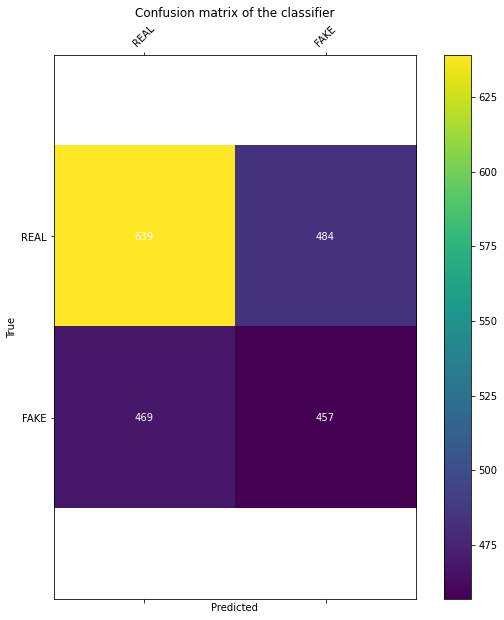

In [19]:
confusion_matrix_heatmap(test_y, pred, labels=['REAL','FAKE'])

# Questions 5 (20%) and 6 (20%) (recommend starting a new notebook)

In [20]:
# Finally, check the accuracy of your classifier by training on all the traning data
# and testing on the test set
# Will only work once all functions are complete
functions_complete = True  # set to True once you're happy with your methods for cross val
if functions_complete:
    print(test_data[0])   # have a look at the first test data instance
    classifier = train_classifier(train_data)  # train the classifier
    test_true = [t[1] for t in test_data]   # get the ground-truth labels from the data
    test_pred = predict_labels([x[0] for x in test_data], classifier)  # classify the test data to get predicted labels
    final_scores = precision_recall_fscore_support(test_true, test_pred, average='weighted') # evaluate
    print("Done training!")
    print("Precision: %f\nRecall: %f\nF Score:%f" % final_scores[:3])

({'the': 9, 'bush': 0, 'tax': 8, 'cuts': 2, 'helped': 4, 'to': 10, 'create': 1, 'substantial': 7, 'part': 6, 'of': 5, 'deficit': 3}, 'REAL')
Training Classifier...
Done training!
Precision: 0.536629
Recall: 0.536847
F Score:0.536735


/Users/samson/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
